# OUR BEST MODEL

Authors:
- Adrián Cox adrcoxgar@gmail.com 
- JC pardo jcparmed@gmail
- David Moscoso dfmoscoso23@gmail.com

In [1]:
# We use a combination of the three Datasets
import pandas as pd
import numpy as np
df=pd.read_csv("sin_pfs.csv",delimiter=";")
df.drop_duplicates(inplace=True)
df.drop(["countryName","FacilityInspireID","City","targetRelease","MONTH","DAY","CONTINENT","REPORTER NAME","CITY ID"], axis=1,inplace=True)

In [2]:
# Encoding of the class column
from sklearn.preprocessing import LabelEncoder
class_labelEncoding = LabelEncoder()
class_labelEncoding.fit(df["pollutant"].values)
clase = class_labelEncoding.transform(df["pollutant"].values)
df["clase"]=clase

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
# After the results of the EDA we saw that the relation core of the relation between 
# the pollution class was with the Sector Name and the Activity label.

df_prueba= pd.get_dummies(df["eprtrSectorName"], prefix=None)
df_indus = pd.get_dummies(df["EPRTRAnnexIMainActivityLabel"], prefix=None)
df_mod = pd.concat([df_prueba,df_indus],axis=1)


<img src="eda.jpg">

In [5]:
#As we can see the in this figure form the EDA the Energy sector have an over sampling. 
#Because of that, we plan make an Undersampling to equilibrate the dataset 
df_sampleado = pd.concat([df_mod, df["clase"]],axis=1)
elegidos=np.random.choice(df_sampleado[df_sampleado["Energy sector"]==1].index,15000)
df_sampleado.drop(elegidos,axis=0,inplace=True)

Jaccard index:  0.5137774924581963
Exactitud:  0.6472582972582973
Precisión:  0.6653746542448467
Sensibilidad:  0.6511351171224101
F1-score:  0.6472588568649885
[[1540  103 2880]
 [ 125 3600  332]
 [1272  177 3831]]


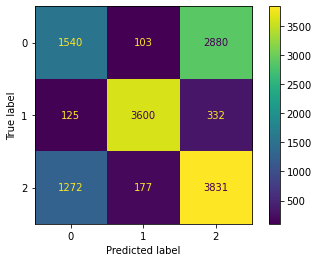

In [6]:
# We use a standar Train y test to prove the model is working
X = df_sampleado.drop(["clase"],axis=1)
y = df_sampleado["clase"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

clf = RandomForestClassifier(n_jobs=-1)
clf = clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy_score(y_test, yhat)
print("Jaccard index: " , jaccard_score(y_test, yhat, average="macro"))
print("Exactitud: " , accuracy_score(y_test, yhat))
print("Precisión: ", precision_score(y_test, yhat, average="macro"))
print("Sensibilidad: ", recall_score(y_test, yhat, average="macro"))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))
cm = confusion_matrix(y_test,yhat)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [7]:
#After the test we trained the model with all the data
X = df_sampleado.drop(["clase"], axis=1)
y = df_sampleado["clase"]


clf = RandomForestClassifier(n_jobs=-1)
clf = clf.fit(X, y)


# TEST DATA

In [8]:
test_data = pd.read_csv("test_x.csv")

In [9]:
df_prueba_test= pd.get_dummies(test_data["eprtrSectorName"], prefix=None)
df_indus_test = pd.get_dummies(test_data["EPRTRAnnexIMainActivityLabel"], prefix=None)
df_test_data = pd.concat([df_prueba_test,df_indus_test],axis=1)

In [10]:
# Equilibrate the amount of the columns of the test data to get usefull in our model
for x in df_sampleado.columns:
    if x  not in df_test_data.columns:
        df_test_data[x]=0

In [11]:
dft=df_test_data.drop(["clase"],axis=1)
yhat = clf.predict(dft)

C:\Users\David\miniconda3\envs\extraccion\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [12]:
predic=pd.Series(yhat)

In [13]:
predictions=predic.to_csv("predictions.csv")

In [14]:
predictions=predic.to_json("predictions.json")